<a href="https://colab.research.google.com/github/ciarangray0/GAA-Video-Analysis/blob/main/YOLO_Bytetrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: install libs
!pip install -q ultralytics roboflow
# (optional helper libs)
!pip install -q matplotlib opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.2 MB/s eta 0:00:00


In [ ]:
# Cell 2: download dataset from Roboflow
from roboflow import Roboflow
from google.colab import userdata
ROB_OFLOW_API_KEY = userdata.get('roboflowAPI')        # <-- REPLACE
WORKSPACE = userdata.get('roboflowWorkspace')              # <-- REPLACE (from your Roboflow URL)
PROJECT = userdata.get('roboflowProject')                   # <-- REPLACE (from your Roboflow URL)
VERSION = 4                                     # change if you need a different version

rf = Roboflow(api_key=ROB_OFLOW_API_KEY)
proj = rf.workspace(WORKSPACE).project(PROJECT)
dataset = proj.version(VERSION).download("yolov8")  # downloads YOLOv8-ready folder

print("Dataset downloaded to:", dataset.location)



loading Roboflow workspace...
loading Roboflow project...
Dataset downloaded to: /content/GAA-Player-Detection-FYP-4


Data root: /content/GAA-Player-Detection-FYP-4
Train images: 198
Val images  : 9
Sample image: /content/GAA-Player-Detection-FYP-4/train/images/108-011641_-_Scores_Against_frame0000_jpg.rf.ec8b66ec15bddfe2ae0d3a479f9d18e7.jpg


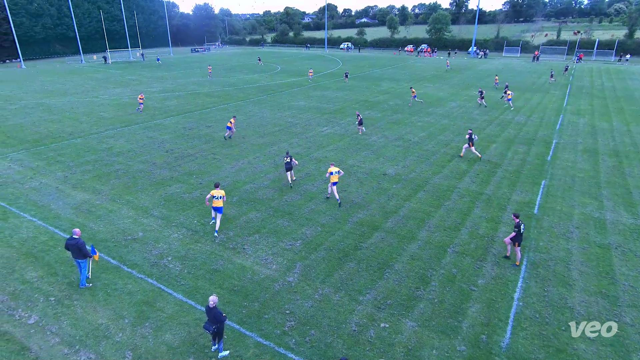

Label file: /content/GAA-Player-Detection-FYP-4/train/labels/108-011641_-_Scores_Against_frame0000_jpg.rf.ec8b66ec15bddfe2ae0d3a479f9d18e7.txt
1 0.22228645833333335 0.2813981481481482 0.020614583333333356 0.06280555555555559
1 0.24625 0.16568518518518519 0.016458333333333346 0.03877777777777777
1 0.32903125 0.1972037037037037 0.01431250000000001 0.042555555555555534
1 0.40538541666666666 0.16574074074074074 0.014937500000000032 0.03148148148148148
1 0.48473958333333333 0.2078611111111111 0.019484375000000043 0.04721296296296297
1 0.5417395833333334 0.21585185185185185 0.016812500000000105 0.03725925925925927
1 0.5618072916666667 0.3398148148148148 0.02361979166666662 0.07408333333333332
1 0.5226197916666666 0.5061388888888889 0.036906249999999946 0.12894444444444444
1 0.3615260416666667 0.3513425925925926 0.019921875 0.06749999999999998
1 0.3368645833333333 0.5848240740740741 0.034145833333333306 0.16779629629629633
1 0.8070052083333333 0.6697685185185185 0.03276562499999992 0.17287037

In [ ]:
# Cell 3: quick check - list files and show a sample image with label
import os, random
from pathlib import Path
from PIL import Image, ImageOps, ImageDraw

data_dir = Path("/content/GAA-Player-Detection-FYP-4")
print("Data root:", data_dir)
print("Train images:", len(list((data_dir/"train"/"images").glob("*.jpg"))))
print("Val images  :", len(list((data_dir/"valid"/"images").glob("*.jpg"))))

# show a random train image and its label file
img_files = list((data_dir/"train"/"images").glob("*.jpg"))
if img_files:
    img_path = random.choice(img_files)
    print("Sample image:", img_path)
    display(Image.open(img_path).resize((640,360)))
    label_path = img_path.with_suffix(".txt").as_posix().replace("/images/","/labels/")
    print("Label file:", label_path)
    if os.path.exists(label_path):
        print(open(label_path).read())


In [ ]:
# Cell 4: train YOLOv8 model
from ultralytics import YOLO
import os

data_yaml = os.path.join(dataset.location, "data.yaml")
print("Using data config:", data_yaml)

# choose model backbone: yolov8n.pt (nano) is fastest; change to yolov8s.pt / yolov8m.pt as needed
model = YOLO("yolov8n.pt")

# Train -- tweak epochs/imgsz/batch depending on GPU and dataset size
model.train(
    data=data_yaml,
    epochs=50,      # set lower (e.g., 20) for a quick test, increase for better results
    imgsz=640,      # 416 or 640
    batch=16,       # Colab may auto-adjust; reduce if OOM
    name="gaa_player_train_colab"
)

# trained weights will be under runs/detect/gaa_player_train_colab/weights/best.pt


Using data config: /content/GAA-Player-Detection-FYP-4/data.yaml
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/GAA-Player-Detection-FYP-4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=gaa_player_train_colab3, nbs=64, nms=False, opset=None, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79528459ad20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
# Cell 5: run inference on test images and save outputs
from ultralytics import YOLO
import glob

# Load best trained model
best = "runs/detect/gaa_player_train_colab3/weights/best.pt"
model = YOLO(best)

# Run predictions on the test set and save results (images with boxes)
test_images = str(Path("/content/GAA-Player-Detection-FYP-4") / "valid" / "images")
print("Running inference on:", test_images)
model.predict(source=test_images, save=True, conf=0.1, line_thickness=1)

# Predictions saved to runs/detect/predict by default (or runs/detect/predict2..)


Running inference on: /content/GAA-Player-Detection-FYP-4/valid/images
WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.

image 1/9 /content/GAA-Player-Detection-FYP-4/valid/images/012-001032_-_Scores_For_frame0045_jpg.rf.ba44c3b0ef104fe3534aac25a13b10da.jpg: 384x640 22 GAA-player-lablerss, 1 Refree-lablers, 39.7ms
image 2/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0000_jpg.rf.d729d54bc73805db8ada3f62869567fb.jpg: 384x640 26 GAA-player-lablerss, 1 Refree-lablers, 6.2ms
image 3/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0017_jpg.rf.2b96c6a49132b2e687d0ff0b76ee079a.jpg: 384x640 13 GAA-player-lablerss, 1 Refree-lablers, 7.8ms
image 4/9 /content/GAA-Player-Detection-FYP-4/valid/images/040-002318_-_Scores_For_frame0030_jpg.rf.a707b13269f1ac878aedff53ff3c782b.jpg: 384x640 18 GAA-player-lablerss, 1 Refree-lablers, 5.8ms
image 5/9 /content/GAA-Player-Detection-FYP-4/va

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ball-labelers', 1: 'GAA-player-lablers', 2: 'Refree-lablers'}
 obb: None
 orig_img: array([[[ 81,  65,  72],
         [ 80,  64,  71],
         [ 79,  61,  68],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 80,  64,  71],
         [ 80,  62,  69],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        [[ 81,  65,  72],
         [ 81,  65,  72],
         [ 82,  64,  71],
         ...,
         [255, 255, 249],
         [255, 255, 249],
         [255, 255, 249]],
 
        ...,
 
        [[ 95, 149, 120],
         [ 98, 152, 123],
         [101, 155, 126],
         ...,
         [ 88, 131, 104],
         [ 83, 128, 102],
         [ 80, 127, 101]],
 
        [[ 96, 150, 121],
         [102, 156, 127],
     

In [ ]:
# Cell 6: run tracking (YOLOv8 + ByteTrack). Requires a video file in Colab environment.
# You can upload a short clip to Colab (Files sidebar -> Upload), name it gaa_clip.mp4.
from ultralytics import YOLO
video_path = "/content/019 001218_-_Turnover_Against.mp4"  # <-- upload a short clip to Colab files
best = "runs/detect/gaa_player_train_colab2/weights/best.pt"
model = YOLO(best)

# This uses the built-in tracker integration (ByteTrack). Output saved automatically.
model.track(source=video_path, tracker="bytetrack.yaml", save=True, conf=0.35, show=True, line_thickness=1)
# Output video saved to runs/track/exp or similar


WARNING ⚠️ 'line_thickness' is deprecated and will be removed in the future. Use 'line_width' instead.
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/338) /content/019 001218_-_Turnover_Against.mp4: 384x640 14 GAA-player-lablerss, 6.8ms
video 1/1 (frame 2/338) /content/019 001218_-_Turnover_Against.mp4: 384x640 13 GAA-player-lablerss, 8.1ms
video 1/1 (frame 3/338) /content/019 001218_-_Turnover_Against.mp4:

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ball-labelers', 1: 'GAA-player-lablers', 2: 'Refree-lablers'}
 obb: None
 orig_img: array([[[223, 216, 201],
         [223, 216, 201],
         [223, 216, 201],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 252, 255]],
 
        [[223, 216, 201],
         [223, 216, 201],
         [223, 216, 201],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 252, 255]],
 
        [[223, 216, 201],
         [223, 216, 201],
         [223, 216, 201],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 252, 255]],
 
        ...,
 
        [[ 29,  76,  59],
         [ 29,  76,  59],
         [ 29,  76,  59],
         ...,
         [ 10,  72,  51],
         [ 10,  72,  51],
         [ 10,  72,  51]],
 
        [[ 26,  77,  60],
         [ 26,  77,  60],
     

In [ ]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO

# -----------------------------
# 1️⃣ Load tracked video
# -----------------------------
video_path = "gaa_clip.mp4"
model = YOLO("runs/detect/gaa_player_train_colab/weights/best.pt")

# Track players (no video output)
results = model.track(
    source=video_path,
    tracker="bytetrack.yaml",
    save=False,
    show=False,
    conf=0.25
)

# -----------------------------
# 2️⃣ Choose a reference frame
# -----------------------------
# Pick a frame where most of the pitch is visible
ref_frame_idx = 0
ref_frame_img = results[ref_frame_idx].orig_img

# -----------------------------
# 3️⃣ Define known points in reference frame
# -----------------------------
# Pixel coordinates in reference frame
pts_frame_ref = np.array([
    [x1_pixel, y1_pixel],  # e.g., top-left goalpost
    [x2_pixel, y2_pixel],  # top-right goalpost
    [x3_pixel, y3_pixel],  # bottom-right goalpost
    [x4_pixel, y4_pixel]   # bottom-left goalpost
], dtype=np.float32)

# Corresponding real-world pitch coordinates (meters)
pts_pitch_ref = np.array([
    [0, 0],
    [80, 0],
    [80, 140],
    [0, 140]
], dtype=np.float32)

# Compute homography from reference frame → pitch meters
H_ref, status = cv2.findHomography(pts_frame_ref, pts_pitch_ref)

# -----------------------------
# 4️⃣ Extract features from reference frame
# -----------------------------
orb = cv2.ORB_create(5000)
ref_gray = cv2.cvtColor(ref_frame_img, cv2.COLOR_BGR2GRAY)
kp_ref, des_ref = orb.detectAndCompute(ref_gray, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# -----------------------------
# 5️⃣ Process all frames and map player coordinates
# -----------------------------
trajectory_data = []

for frame_idx, frame_result in enumerate(results):
    frame_gray = cv2.cvtColor(frame_result.orig_img, cv2.COLOR_BGR2GRAY)

    # Detect features in current frame
    kp_frame, des_frame = orb.detectAndCompute(frame_gray, None)
    if des_frame is None or len(kp_frame) < 10:
        continue  # skip frame

    # Match features to reference frame
    matches = bf.match(des_frame, des_ref)
    if len(matches) < 4:
        continue  # need at least 4 matches for homography

    matches = sorted(matches, key=lambda x: x.distance)[:50]  # top matches
    pts_frame = np.float32([kp_frame[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    pts_ref = np.float32([kp_ref[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

    # Compute frame → reference homography
    H_frame, status = cv2.findHomography(pts_frame, pts_ref, cv2.RANSAC, 5.0)
    if H_frame is None:
        continue

    # Map each player bbox center to reference frame, then to pitch meters
    boxes = frame_result.boxes
    for box, cls, conf, track_id in zip(boxes.xyxy, boxes.cls, boxes.conf, boxes.id):
        x1, y1, x2, y2 = box
        x_c = (x1 + x2) / 2
        y_c = (y1 + y2) / 2

        pixel = np.array([x_c, y_c, 1]).reshape(3, 1)

        # Apply frame → reference, then reference → pitch
        pitch_coord = H_ref @ (H_frame @ pixel)
        pitch_coord /= pitch_coord[2, 0]  # normalize

        x_pitch, y_pitch = pitch_coord[0, 0], pitch_coord[1, 0]

        # Approximate bbox size in meters
        video_width = frame_result.orig_img.shape[1]
        video_height = frame_result.orig_img.shape[0]
        width_m = (x2 - x1) * (80 / video_width)
        height_m = (y2 - y1) * (140 / video_height)

        trajectory_data.append([
            frame_idx, int(track_id), x_pitch, y_pitch, width_m, height_m, float(conf)
        ])

# -----------------------------
# 6️⃣ Save CSV
# -----------------------------
columns = ["frame", "player_id", "x_m", "y_m", "bbox_width_m", "bbox_height_m", "conf"]
df = pd.DataFrame(trajectory_data, columns=columns)
df.to_csv("player_trajectories_dynamic_reference.csv", index=False)
print("Trajectories saved to player_trajectories_dynamic_reference.csv")
